In [1]:
from skimage.io import imread,imshow
from skimage.color import rgb2gray
import numpy as np

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

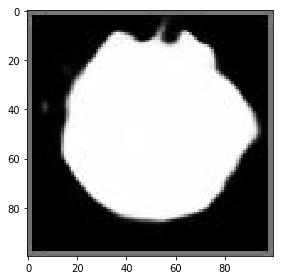

In [2]:
test_path = 'segmentation_WBC-master/Fulltest2/set1/label/0.jpg'
label_path = 'WBC_H1Dcq__WBC__300x300 Image/masks_machine/0.png'
test_img = imread(test_path)
test_img = rgb2gray(test_img)
label_img = imread(label_path,as_gray = True)
label_img = rgb2gray(label_img)
imshow(test_img)
label_img

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


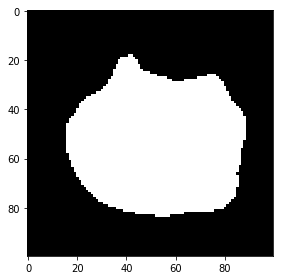

In [3]:
from skimage.filters import threshold_otsu, threshold_local

global_thresh = threshold_otsu(label_img)
binary_label = label_img > global_thresh

imshow(binary_label)

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


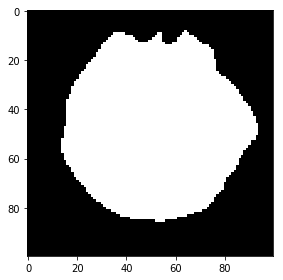

In [4]:
for i in range(test_img.shape[0]):
    for j in range(0,2):
        test_img[i,j] = 0
        test_img[j,i] = 0
        last_idx = test_img.shape[1]-1-j
        test_img[i,last_idx] = 0
        test_img[last_idx,i] = 0

global_thresh = threshold_otsu(test_img)
binary_test = test_img > global_thresh

imshow(binary_test)

In [12]:
over = 0
under = 0
tp = 0

for i in range(binary_test.shape[0]):
    for j in range(binary_test.shape[1]):
        if binary_test[i][j] == True and binary_label[i][j] == False:
            over += 1
        elif binary_test[i][j] == False and binary_label[i][j] == True:
            under+= 1
        elif binary_test[i][j] == True and binary_label[i][j] == True:
            tp += 1
        

In [13]:
test_cell = np.sum(binary_test)
label_cell = np.sum(binary_label)

In [14]:
OR = under/(over+tp)

In [16]:
OR*100

2.2506619593998236

In [17]:
UR = over/(over+tp)

In [21]:
UR*100

23.676081200353043

In [19]:
ER = (under+over)/tp

In [20]:
ER*100

33.96935530500145